数据集形状: (1757, 26)
缺失值统计:
Environment        1757
Unnamed: 24        1757
Trans Mode         1757
Grade              1757
Crop               1757
Storage            1757
Appearance         1757
Condition          1757
Quality            1757
Type               1712
Unnamed: 25        1654
Origin District    1626
Unit of Sale       1595
Sub Variety        1461
Color               616
Item Size           279
Mostly High         103
Mostly Low          103
Variety               5
Origin                3
High Price            0
Low Price             0
Date                  0
Repack                0
Package               0
City Name             0
dtype: int64


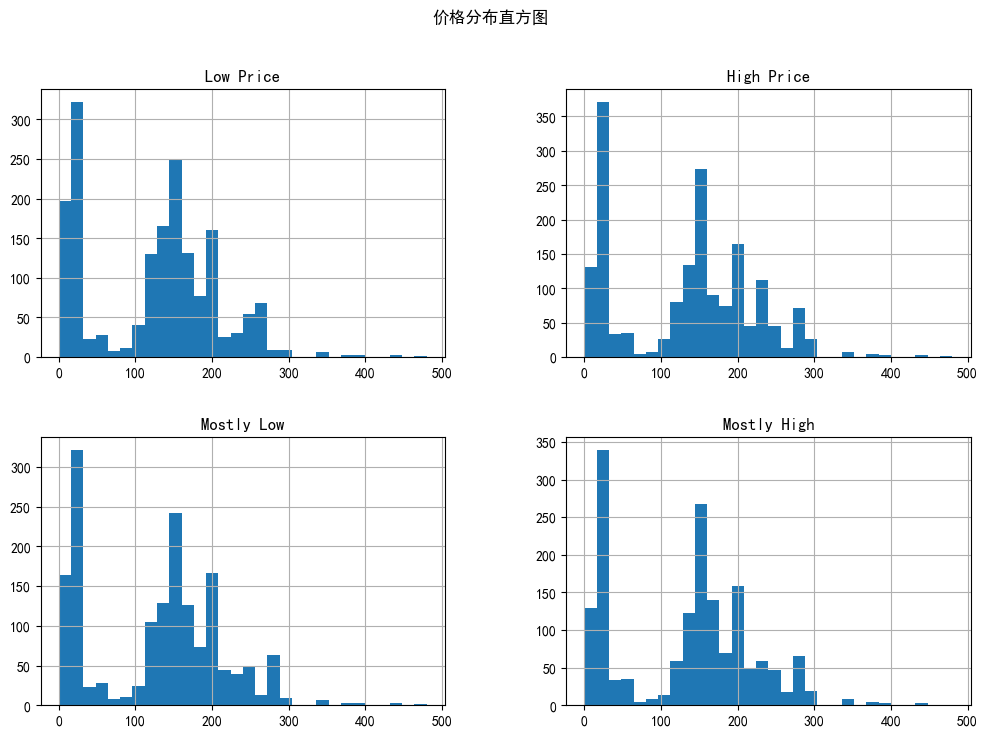

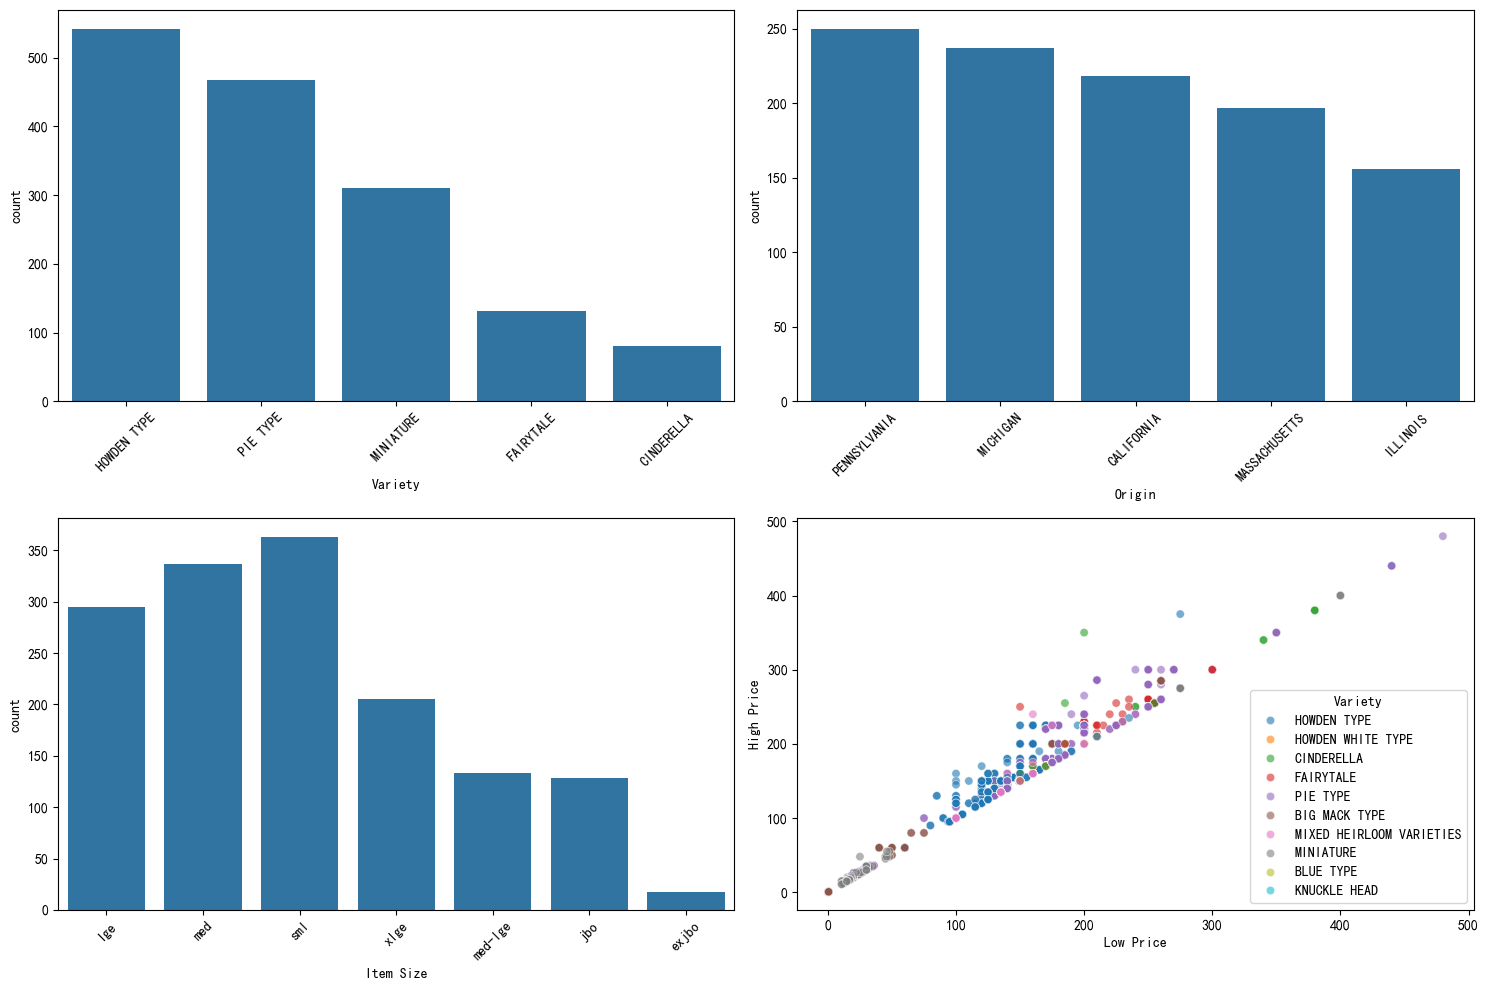

C:\Users\86182\AppData\Local\Temp\ipykernel_12812\2425704121.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


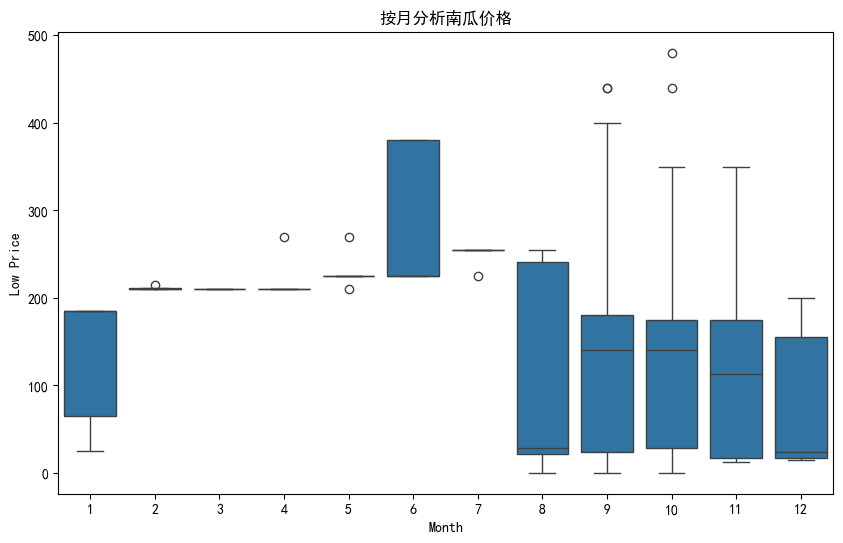

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# 加载数据
df = pd.read_csv('US-pumpkins.csv')
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 基础信息
print(f"数据集形状: {df.shape}")
print(f"缺失值统计:\n{df.isnull().sum().sort_values(ascending=False)}")

# 价格分布分析
price_cols = ['Low Price', 'High Price', 'Mostly Low', 'Mostly High']
df[price_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle('价格分布直方图')
plt.show()

# 关键特征分布
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(data=df, x='Variety', ax=ax[0][0], order=df['Variety'].value_counts().iloc[:5].index)
ax[0][0].tick_params(axis='x', rotation=45)
sns.countplot(data=df, x='Origin', ax=ax[0][1], order=df['Origin'].value_counts().iloc[:5].index)
ax[0][1].tick_params(axis='x', rotation=45)
sns.countplot(data=df, x='Item Size', ax=ax[1][0])
ax[1][0].tick_params(axis='x', rotation=45)
sns.scatterplot(data=df, x='Low Price', y='High Price', hue='Variety', alpha=0.6, ax=ax[1][1])
plt.tight_layout()
plt.show()

# 日期转换和按月分析
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='Low Price')
plt.title('按月分析南瓜价格')
plt.show()